In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import glob
import collections
# read top neurons
import yaml 
import sys  
sys.path.append('../')
from my_package.cma import get_topk
import os

/tmp/ipykernel_234685/2071739528.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [21]:
# ../pickles/top_neurons/nie_recent_baseline/top_neuron_1548_percent_Low-overlap_all_layers.pickle

In [22]:
import seaborn as sns
import pandas as pd 
top_neuron_path = '../../pickles/top_neurons/'
method_names = ['recent_baseline', 'baseline_fever','baseline_qqp_mysplit']
datasets_names = ['MNLI', 'FEVER',  'QQP'] 
seed = 1548
masking_mode = 'percent'
do = 'High-overlap'
key = 0.05
data = {}
df = {}

[None, None]

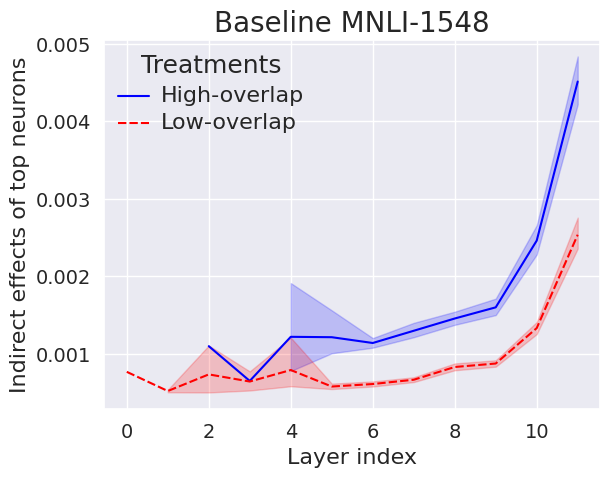

In [34]:
# method_names = ['separation_replace_intervention_recent_baseline', 'nie_recent_baseline']
# interventions = ['Null', 'inject_bias']
method_names = ['nie_recent_baseline','nie_recent_baseline']
interventions = ['High-overlap','Low-overlap']

seed = 1548
x_layer = []
y_nie = []
line_type = []
top_neurons = {}

for method_name, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{intervention}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons[intervention] = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[intervention][key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[intervention][key].items()])
    line_type.extend([intervention] * len(top_neurons[intervention][key])  )
    


data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatments': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Treatments", style="Treatments", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

In [35]:
top_neurons['High-overlap']

{0.05: {'L-11-I-2684': tensor(0.0595),
  'L-11-AO-409': tensor(0.0543),
  'L-11-I-468': tensor(0.0350),
  'L-10-AO-409': tensor(0.0345),
  'L-5-I-2478': tensor(0.0342),
  'L-11-O-409': tensor(0.0332),
  'L-10-O-409': tensor(0.0329),
  'L-11-AO-373': tensor(0.0295),
  'L-11-I-2546': tensor(0.0289),
  'L-11-O-158': tensor(0.0287),
  'L-11-AO-158': tensor(0.0278),
  'L-11-AO-560': tensor(0.0263),
  'L-11-O-10': tensor(0.0256),
  'L-11-O-544': tensor(0.0251),
  'L-10-I-419': tensor(0.0248),
  'L-11-AO-31': tensor(0.0237),
  'L-11-AO-508': tensor(0.0236),
  'L-11-AO-10': tensor(0.0234),
  'L-11-AO-544': tensor(0.0232),
  'L-11-AO-551': tensor(0.0223),
  'L-11-O-696': tensor(0.0222),
  'L-11-O-741': tensor(0.0222),
  'L-11-O-373': tensor(0.0221),
  'L-11-O-551': tensor(0.0219),
  'L-11-O-151': tensor(0.0218),
  'L-11-O-31': tensor(0.0218),
  'L-11-O-508': tensor(0.0215),
  'L-11-AO-151': tensor(0.0207),
  'L-11-AO-411': tensor(0.0203),
  'L-11-O-724': tensor(0.0202),
  'L-11-AO-741': tensor(

In [36]:
top_neurons['Low-overlap'] 

{0.05: {'L-11-AO-308': tensor(0.0679),
  'L-11-I-2684': tensor(0.0280),
  'L-11-O-592': tensor(0.0177),
  'L-11-O-158': tensor(0.0148),
  'L-11-AO-158': tensor(0.0142),
  'L-11-O-401': tensor(0.0141),
  'L-11-O-1': tensor(0.0135),
  'L-11-O-10': tensor(0.0128),
  'L-11-O-696': tensor(0.0123),
  'L-11-O-603': tensor(0.0121),
  'L-11-AO-592': tensor(0.0117),
  'L-11-O-213': tensor(0.0115),
  'L-11-O-268': tensor(0.0112),
  'L-11-O-727': tensor(0.0112),
  'L-11-AO-10': tensor(0.0112),
  'L-11-AO-409': tensor(0.0109),
  'L-11-AO-572': tensor(0.0109),
  'L-11-O-544': tensor(0.0108),
  'L-11-AO-696': tensor(0.0107),
  'L-11-AO-544': tensor(0.0107),
  'L-11-O-164': tensor(0.0106),
  'L-11-AO-670': tensor(0.0105),
  'L-11-I-468': tensor(0.0103),
  'L-11-O-488': tensor(0.0102),
  'L-11-I-2555': tensor(0.0100),
  'L-11-AO-560': tensor(0.0100),
  'L-10-I-419': tensor(0.0097),
  'L-11-AO-551': tensor(0.0097),
  'L-11-AO-1': tensor(0.0096),
  'L-11-I-241': tensor(0.0096),
  'L-11-I-1737': tensor(0.

/tmp/ipykernel_234685/2484896781.py:26: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Treatments", style="Treatments", palette=['blue', 'red'])


[None, None]

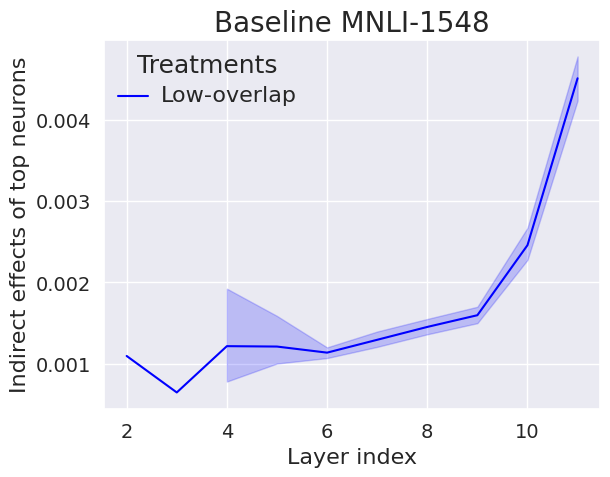

In [6]:
method_names = ['nie_recent_baseline']
interventions = ['Low-overlap']

seed = 1548
x_layer = []
y_nie = []
line_type = []

for method_name, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )
    


data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Treatments': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Treatments", style="Treatments", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

In [7]:
top_neurons

{0.05: {'L-11-I-2684': tensor(0.0595),
  'L-11-AO-409': tensor(0.0543),
  'L-11-I-468': tensor(0.0350),
  'L-10-AO-409': tensor(0.0345),
  'L-5-I-2478': tensor(0.0342),
  'L-11-O-409': tensor(0.0332),
  'L-10-O-409': tensor(0.0329),
  'L-11-AO-373': tensor(0.0295),
  'L-11-I-2546': tensor(0.0289),
  'L-11-O-158': tensor(0.0287),
  'L-11-AO-158': tensor(0.0278),
  'L-11-AO-560': tensor(0.0263),
  'L-11-O-10': tensor(0.0256),
  'L-11-O-544': tensor(0.0251),
  'L-10-I-419': tensor(0.0248),
  'L-11-AO-31': tensor(0.0237),
  'L-11-AO-508': tensor(0.0236),
  'L-11-AO-10': tensor(0.0234),
  'L-11-AO-544': tensor(0.0232),
  'L-11-AO-551': tensor(0.0223),
  'L-11-O-696': tensor(0.0222),
  'L-11-O-741': tensor(0.0222),
  'L-11-O-373': tensor(0.0221),
  'L-11-O-551': tensor(0.0219),
  'L-11-O-151': tensor(0.0218),
  'L-11-O-31': tensor(0.0218),
  'L-11-O-508': tensor(0.0215),
  'L-11-AO-151': tensor(0.0207),
  'L-11-AO-411': tensor(0.0203),
  'L-11-O-724': tensor(0.0202),
  'L-11-AO-741': tensor(

In [5]:
top_neurons

{0.05: {'L-11-I-2684': tensor(0.0595),
  'L-11-AO-409': tensor(0.0543),
  'L-11-I-468': tensor(0.0350),
  'L-10-AO-409': tensor(0.0345),
  'L-5-I-2478': tensor(0.0342),
  'L-11-O-409': tensor(0.0332),
  'L-10-O-409': tensor(0.0329),
  'L-11-AO-373': tensor(0.0295),
  'L-11-I-2546': tensor(0.0289),
  'L-11-O-158': tensor(0.0287),
  'L-11-AO-158': tensor(0.0278),
  'L-11-AO-560': tensor(0.0263),
  'L-11-O-10': tensor(0.0256),
  'L-11-O-544': tensor(0.0251),
  'L-10-I-419': tensor(0.0248),
  'L-11-AO-31': tensor(0.0237),
  'L-11-AO-508': tensor(0.0236),
  'L-11-AO-10': tensor(0.0234),
  'L-11-AO-544': tensor(0.0232),
  'L-11-AO-551': tensor(0.0223),
  'L-11-O-696': tensor(0.0222),
  'L-11-O-741': tensor(0.0222),
  'L-11-O-373': tensor(0.0221),
  'L-11-O-551': tensor(0.0219),
  'L-11-O-151': tensor(0.0218),
  'L-11-O-31': tensor(0.0218),
  'L-11-O-508': tensor(0.0215),
  'L-11-AO-151': tensor(0.0207),
  'L-11-AO-411': tensor(0.0203),
  'L-11-O-724': tensor(0.0202),
  'L-11-AO-741': tensor(

In [ ]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 3099
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )


data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

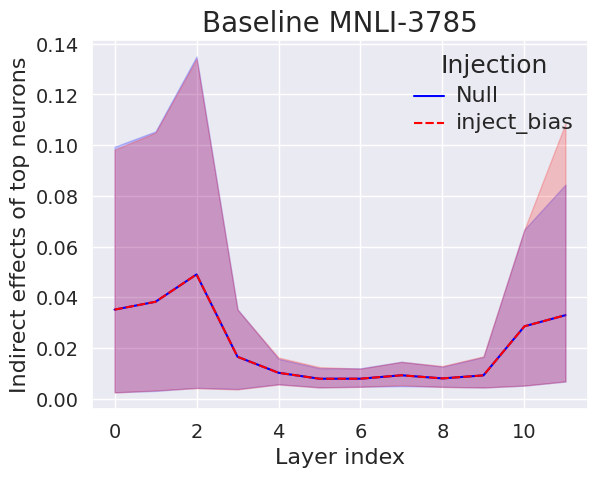

In [5]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 3785
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )



data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

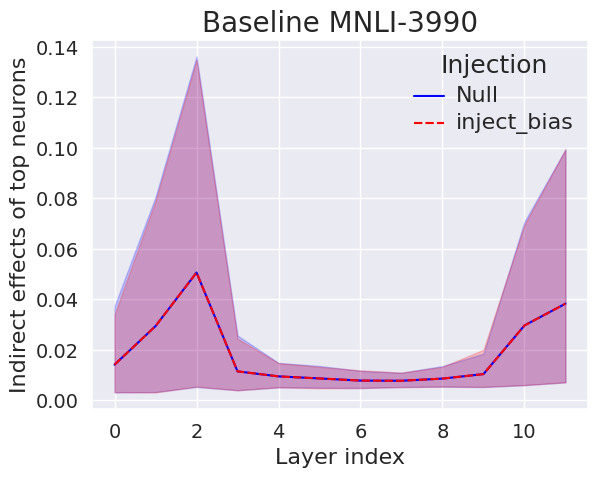

In [6]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 3990
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )


data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

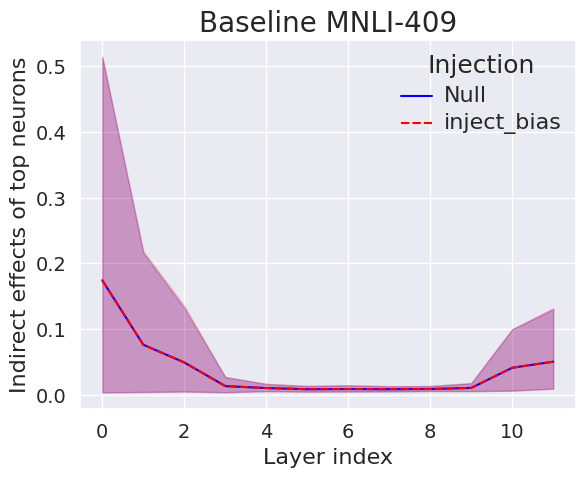

In [7]:
method_names = ['separation_replace_intervention_recent_baseline', 'separation_pcgu_posgrad_replace_5k_recent_baseline']
interventions = ['Null', 'inject_bias']
seed = 409
x_layer = []
y_nie = []
line_type = []

for method_namne, intervention in zip(method_names, interventions):
    path = os.path.join(top_neuron_path, method_name)
    path = os.path.join(path,f'top_neuron_{seed}_{masking_mode}_{do}_all_layers.pickle')
    with open(path, 'rb') as handle: top_neurons = pickle.load(handle)
    current_dataset = f'Baseline MNLI-{seed}'
    x_layer.extend([ int(pos.split('-')[1]) for pos, nie in top_neurons[key].items()])
    y_nie.extend([float(nie) for pos, nie in top_neurons[key].items()])
    line_type.extend([intervention] * len(top_neurons[key])  )



data = {'Layer index': x_layer,
        'Indirect effects of top neurons':  y_nie,
         'Injection': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Injection", style="Injection", palette=['blue', 'red'])
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title